This Jupyter notebook presents a Loan Prediction Model aimed at determining the approval status of loans. The dataset used in this analysis was preprocessed and explored to gain insights into the features impacting loan approval.

The loan status is a binary target variable where:

1 represents a loan being approved, and
0 represents a loan being denied.
Modeling Approach:
I employed three different machine learning models to predict the loan status:

Decision Tree Classifier: A simple and interpretable model that splits the data based on features to make predictions.
Random Forest Classifier: An ensemble learning method that builds multiple decision trees and combines their outputs for more robust predictions.
Gaussian Naive Bayes (GNB): A probabilistic model based on Bayes' theorem, assuming that the features follow a normal distribution.
Model Performance:
After training and testing the models, the Gaussian Naive Bayes model outperformed the other two, achieving the best prediction accuracy. Its performance can be attributed to its ability to handle categorical and numerical variables efficiently, along with its probabilistic nature, which tends to generalize well on unseen data.


Among the three models:

Gaussian Naive Bayes proved to be the most effective in predicting the loan status, followed by the Random Forest and Decision Tree models.
The results suggest that a probabilistic approach like Naive Bayes might capture the relationships between loan features and their outcomes more effectively for this particular dataset.
This analysis highlights the potential for improving loan approval prediction using machine learning techniques and shows the effectiveness of different algorithms in solving such binary classification problems.

Key Insights from Loan Prediction Analysis:
Applicant Income and Education Level:

The ApplicantIncome feature shows significant variability, with graduates having higher income on average compared to non-graduates.
However, both groups contain outliers, as seen in the boxplot analysis, with some applicants having extremely high incomes.
Credit History as a Major Predictor:

The loan status is heavily influenced by Credit History. Applicants with a clear credit history (value of 1.0) have a much higher probability of loan approval than those with a poor credit history (value of 0.0).
Distribution of Loan Approval:

There is an overall imbalance between approved and denied loans, with more loans being approved than denied.

Outlier Impact:

There are notable outliers in income distribution that could impact model performance. Removing or handling these outliers might lead to improved prediction accuracy in future iterations of the model.
Conclusion:
The analysis indicates that features such as Credit History and Applicant Income play critical roles in predicting loan approval. A balanced approach using a probabilistic model like Gaussian Naive Bayes was most successful, making it the recommended model for this task.

In [1]:
#import necessary libraries 
import pandas as pd #for data manipulation 
import numpy as np #for numerical python 
import matplotlib.pyplot as plt #data visualization 
import seaborn as sns #data visualizzation 
%matplotlib inline 

In [2]:
df=pd.read_csv("C:\\Users\\Administrator\\Downloads\\loan.csv")

In [3]:
#print the first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#find the shape of the dataset 
print(df.shape[0],'number of rows in the dataset')
print(df.shape[1],'number of columns in the dataset')

614 number of rows in the dataset
13 number of columns in the dataset


In [5]:
#check dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has 3 datatypes,float,int and object. 

In [7]:
#statistical analysis 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Key Insights:

Applicant Income varies widely, ranging from 150 to 81,000, with a significant standard deviation indicating high income disparities.

Many applicants did not have a co-applicant (as indicated by the 0 values for coapplicant income at the 25th percentile).
Loan amounts also show substantial variation, with most loans ranging between 100 and 168 units.

The majority of loans have a term of 360 months (30 years).

Most applicants had a good credit history (as the median credit history is 1, indicating no defaults).

In [9]:
#how the credit history affect the loan status of each apllicant 
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins =True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Key Insights:
Applicants with poor credit history (0.0):

82 applicants with poor credit history were denied a loan.
7 applicants with poor credit history were approved for a loan.
Total: 89 applicants had a poor credit history.

Applicants with good credit history (1.0):

97 applicants with good credit history were denied a loan.
378 applicants with good credit history were approved for a loan.
Total: 475 applicants had a good credit history.

Overall totals:

179 loans were not approved.
385 loans were approved.
Total: 564 loan applications were processed in total.

Summary:
Approval rate is significantly higher for applicants with good credit history (378 approvals out of 475) compared to those with poor credit history (only 7 approvals out of 89).
Poor credit history leads to a much higher rate of loan denial.

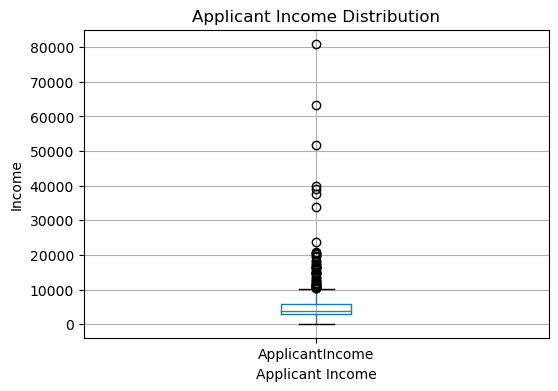

In [11]:
plt.figure(figsize=(6,4))  # Set the figure size
# Create the boxplot for ApplicantIncome
df.boxplot(column='ApplicantIncome')
# Add labels and title
plt.title('Applicant Income Distribution')
plt.ylabel('Income')
plt.xlabel('Applicant Income')
# Show the plot
plt.show()

Interpretation:

The majority of the applicants have incomes clustered around a lower range, but there is a small number of applicants with much higher incomes (outliers).

The presence of many outliers suggests that applicant incomes in this dataset vary significantly, with a few applicants earning considerably more than the rest.

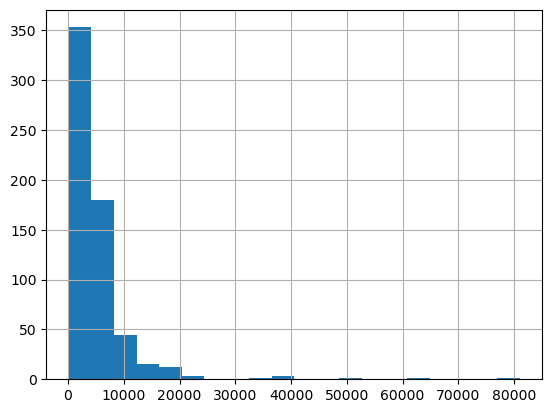

<Figure size 600x400 with 0 Axes>

In [13]:
#histogram for Applicant income 
df['ApplicantIncome'].hist(bins=20)
plt.figure(figsize=(6,4))  # Set the figure size
plt.show()

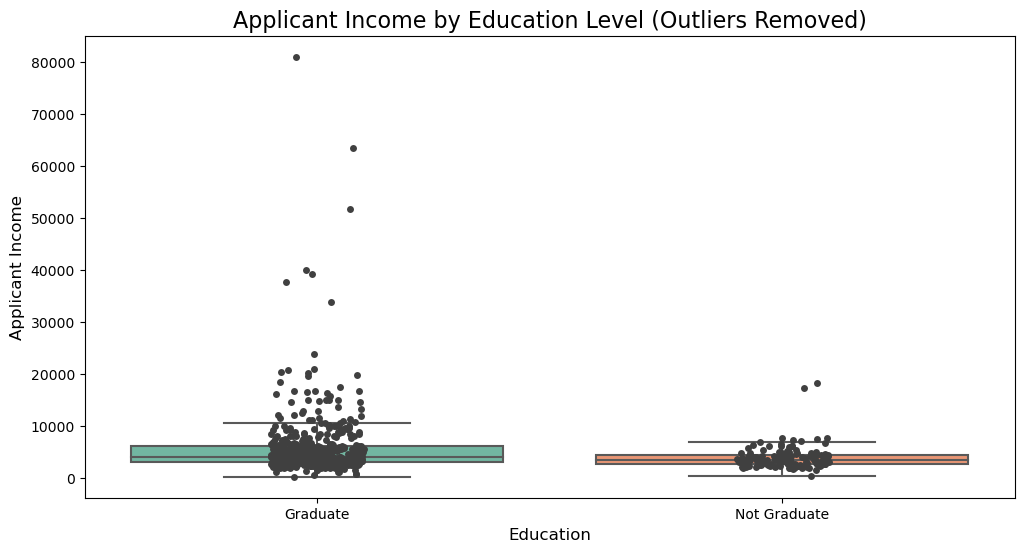

                     mean          std
Education                             
Graduate      5857.433333  6739.797954
Not Graduate  3777.283582  2237.081586


In [14]:
# Set figure size for the plot
plt.figure(figsize=(12, 6))  # Increased figure width

# Create a boxplot with color differentiation for each group (Graduate, Not Graduate)
sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette='Set2', showfliers=False)  # showfliers=False removes outliers

# Overlay a stripplot (alternative to swarmplot) to show the actual data points distribution
sns.stripplot(x='Education', y='ApplicantIncome', data=df, color='.25', jitter=True)  # Use stripplot instead of swarmplot

# Add title and axis labels
plt.title('Applicant Income by Education Level (Outliers Removed)', fontsize=16)
plt.ylabel('Applicant Income', fontsize=12)
plt.xlabel('Education', fontsize=12)

# Display the plot
plt.show()

# Calculate and display statistical summary (mean, std) per group
summary = df.groupby('Education')['ApplicantIncome'].agg(['mean', 'std'])
print(summary)

Key Observations:
Outliers:

Several high-income outliers are present in the Graduate group, with some applicants earning over 40,000 and even up to 80,000. These are shown as individual dots above the main boxplot.
The Not Graduate group has fewer and lower outliers, indicating more consistency in income distribution among non-graduates.
Distribution:

Most of the data points for both groups are clustered below 10,000, as evidenced by the dense grouping of dots around this range. This suggests that the majority of applicants, regardless of their education level, earn relatively modest incomes.
Variability:

The box for Graduates is taller, indicating higher variability in income, while the box for Not Graduates is shorter, showing less variability. This aligns with the earlier statistical summary, where graduates have both a higher mean income and a larger standard deviation.

Key Insights:
Graduate applicants generally earn more than non-graduates, as shown by the higher median income and wider spread of values.

There are several high-income outliers, especially among the graduates, which indicates that a small number of applicants earn significantly more than others.

<Axes: >

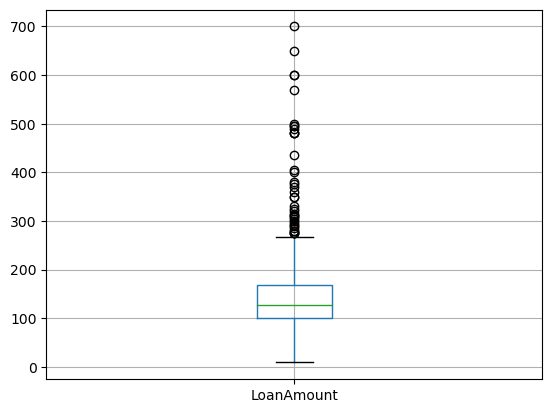

In [16]:
#loan amount variable 
df.boxplot(column='LoanAmount')

Loan amount column has outliers 

<Axes: >

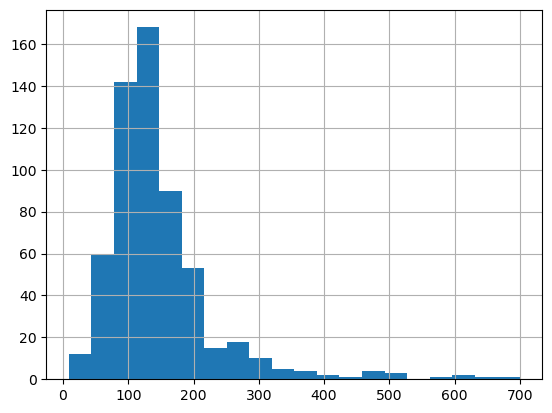

In [18]:
df['LoanAmount'].hist(bins=20)

<Axes: >

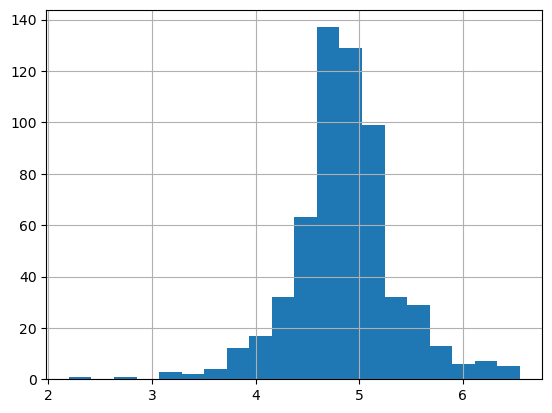

In [19]:
#normalizing loan amount 
df['Loanamount_log']=np.log(df['LoanAmount'])
df['Loanamount_log'].hist(bins=20)

In [20]:
#checking for nulls
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loanamount_log       22
dtype: int64

In [21]:
#We replace the missing values with mode for categorical columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace =True)
df['Married'].fillna(df['Married'].mode()[0],inplace =True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace =True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [22]:
#replace the missing values with mean in non categorical column
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loanamount_log =df.Loanamount_log .fillna(df['Loanamount_log'].mean())



In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loanamount_log       0
dtype: int64

All the null values have been replaced with either mean for non categorical varaibles and mode for categorical variables 

In [25]:
#normalization of total income and Applicant income 
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

<Axes: >

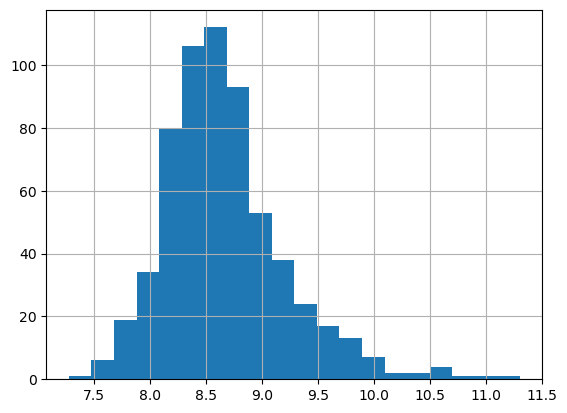

In [26]:
#use histogram to check if the values have been normalize and there is no skewness
df['TotalIncome_log'].hist(bins=20)

The values have been normalized complitely

In [28]:
#Check for the 5 five rows 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [29]:
#divide the dataset for dependend and independed variables 
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [30]:
print(x)

[['Male' 'No' '0' ... 1.0 4.857444178729352 5849.0]
 ['Male' 'Yes' '1' ... 1.0 4.852030263919617 6091.0]
 ['Male' 'Yes' '0' ... 1.0 4.189654742026425 3000.0]
 ...
 ['Male' 'Yes' '1' ... 1.0 5.53338948872752 8312.0]
 ['Male' 'Yes' '2' ... 1.0 5.231108616854587 7583.0]
 ['Female' 'No' '0' ... 0.0 4.890349128221754 4583.0]]


In [31]:
#print the dataset into train and test using train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
#display the x-train
print(x_train)

[['Male' 'Yes' '0' ... 1.0 5.579729825986222 8250.0]
 ['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'Yes' '2' ... 1.0 5.3471075307174685 7945.0]
 ...
 ['Female' 'No' '0' ... 1.0 3.4011973816621555 3237.0]
 ['Female' 'Yes' '0' ... 1.0 4.857444178729352 10047.0]
 ['Male' 'Yes' '0' ... 1.0 4.857444178729352 13650.0]]


In [33]:
#label encode categorical columns 

from sklearn.preprocessing import LabelEncoder 
labelencoder_x= LabelEncoder()
for i in range(0, 5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])

x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [34]:
#check x _train after label encoder 
x_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.857444178729352, 381],
       [1, 1, 0, ..., 1.0, 4.857444178729352, 414]], dtype=object)

In [35]:
#lable encode y_train 
labelencoder_y=LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [36]:
#check if the y train have been converted 
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [37]:
#label encode x_test
for i in range(0, 5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])

x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 1, 0, 0, 3, 1.0, 5.429345628954441, 109],
       [1, 1, 0, 0, 3, 1.0, 4.867534450455582, 37],
       [1, 1, 2, 0, 3, 1.0, 5.062595033026967, 71],
       [0, 0, 0, 0, 3, 1.0, 4.2626798770413155, 11],
       [1, 0, 0, 0, 3, 1.0, 4.248495242049359, 7],
       [1, 1, 1, 0, 3, 1.0, 4.672828834461906, 33],
       [1, 1, 2, 0, 3, 1.0, 4.787491742782046, 24],
       [1, 1, 0, 0, 3, 1.0, 4.189654742026425, 13],
       [1, 1, 3, 1, 3, 1.0, 5.153291594497779, 36],
       [1, 1, 1, 0, 3, 1.0, 4.700480365792417, 34],
       [1, 1, 2, 0, 3, 0.0, 4.276666119016055, 57],
       [1, 1, 0, 0, 3, 1.0, 5.030437921392435, 62],
       [1, 1, 3, 1, 4, 1.0, 4.543294782270004, 10],
       [1, 1, 2, 1, 3, 1.0, 4.857444178729352, 61],
       [1, 1, 2, 0, 3, 1.0, 4.477336814478207, 94],
       [1, 1, 0, 0, 2, 1.0, 4.553876891600541, 80],
       [1, 0, 0, 0, 3, 1.0, 4.07753744390572, 4],
       [1, 0, 0, 0, 3, 1.0, 5.017279836814924, 107],
       [1, 1, 1, 0, 3, 1.0, 4.941642422609304, 55],
       [1, 1

In [38]:
#label encode y_test
labelencoder_y=LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [39]:
#scaling the numerical features using standard scaler 
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)


In [40]:
#make prediction using DecisionTree Classifier 
from sklearn.tree import DecisionTreeClassifier 
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
#make the prediction 
y_pred= DTC.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [42]:
#evalute the resuts by finding the accuracy 
from sklearn import metrics 
print('The acccuracy of the decision tree is:', metrics.accuracy_score(y_pred,y_test))

The acccuracy of the decision tree is: 0.6910569105691057


The accuracy is very low hence we will go ahead and look for another model Rnadom Forest 

In [89]:
#make prediction using Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(criterion='entropy',random_state=0)
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [91]:
#make the prediction 
y_pred= RFC.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [93]:
print('The acccuracy of the Random Forest  is:', metrics.accuracy_score(y_pred,y_test))

The acccuracy of the Random Forest  is: 0.7398373983739838


In [44]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [45]:
#lets make the prediction 
y_pred =GNB.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
#evaluate and print the accuarcy 
print('The accuracy of Naive Bayes is :', metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is : 0.7804878048780488
